<a href="https://colab.research.google.com/github/mechamrit/StockAnalysis/blob/master/stocks4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trade Call Prediction using Classification


In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Import the csv file of the stock which contained the Bollinger columns as well i.e boll.csv in module 2.

In [2]:
df1 = pd.read_csv('boll.csv')
df1.head(3)

,Date,High,Low,Open,Close,Volume,Adj Close,Day_perc_change,Trend,Upperband,Lowerband,Middle
0,2018-07-03,1135.819946,1100.020020,1135.819946,1102.890015,679000,1102.890015,-0.021792,Slight or No Change,NaN,NaN,NaN
1,2018-07-05,1127.500000,1108.479980,1110.530029,1124.270020,1066700,1124.270020,0.019385,Slight or No Change,NaN,NaN,NaN
2,2018-07-06,1140.930054,1120.737061,1123.579956,1140.170044,996100,1140.170044,0.014143,Slight or No Change,NaN,NaN,NaN


In [0]:
## Droppping the nan rows
df1.dropna(inplace=True)

Creating a new column 'Call' , whose entries are - 

>'Buy' if the stock price is below the lower Bollinger band 

>'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 

>'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 

>'Short' if the stock price is above the upper Bollinger band

In [0]:


conditions = [(df1['Close']< df1['Lowerband']),
            ((df1['Close'] < df1.Middle) & (df1['Close'] > df1.Lowerband)),
            ((df1['Close']> df1.Middle) & (df1['Close']< df1.Upperband)),
            (df1['Close']< df1.Upperband) 
]


choices =[
            'Buy',
            'Hold Buy/Liquidate Short',
            'Hold Short/Liquidate Buy',
            'Short'
]


df1['Call'] = np.select(conditions, choices)
df1.drop(df1[df1.Call== '0'].index,axis=0,inplace=True)


# Training the  Model
Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output

In [0]:
df1.isnull().values.any()
df1.dropna(inplace=True)

In [6]:
df1.Call.unique()

array(['Hold Short/Liquidate Buy', 'Hold Buy/Liquidate Short', 'Buy'],
      dtype=object)

In [7]:
df1[df1['Call'].values == 'Hold Short/Liquidate Buy'].count()

Date               112
High               112
Low                112
Open               112
Close              112
Volume             112
Adj Close          112
Day_perc_change    112
Trend              112
Upperband          112
Lowerband          112
Middle             112
Call               112
dtype: int64

## Preprocessing The Data



To center the data (make it have zero mean and unit standard error), you subtract the mean and then divide the result by the standard deviation.

x′=x−μσ

You do that on the training set of data. But then you have to apply the same transformation to your testing set (e.g. in cross-validation), or to newly obtained examples before forecast. But you have to use the same two parameters μ
and σ

(values) that you used for centering the training set.

Hence, every sklearn's transform's fit() just calculates the parameters (e.g. μ
and σ

in case of StandardScaler) and saves them as an internal objects state. Afterwards, you can call its transform() method to apply the transformation to a particular set of examples.

fit_transform() joins these two steps and is used for the initial fitting of parameters on the training set x
, but it also returns a transformed x′. Internally, it just calls first fit() and then transform() on the same data.[source](https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models)

In [0]:
## Training this model with the Logistic Regression
## Here we have to define the data
X = df1[['Close','Upperband','Lowerband','Middle']].values
Y = df1['Call'].values

## Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

## Logistic Regression


In [9]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,y_train)

y1_pred = model1.predict(X_test)

## Checking the model with confusion metrice

cm = confusion_matrix(y_test,y1_pred)
cm

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([[ 0,  2,  0],
       [ 0, 21,  0],
       [ 0,  0, 23]])

In [10]:
## Classification report 
print(classification_report(y_test, y1_pred))

                          precision    recall  f1-score   support

                     Buy       0.00      0.00      0.00         2
Hold Buy/Liquidate Short       0.91      1.00      0.95        21
Hold Short/Liquidate Buy       1.00      1.00      1.00        23

                accuracy                           0.96        46
               macro avg       0.64      0.67      0.65        46
            weighted avg       0.92      0.96      0.94        46



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## K-Nearest Neighbour Classification

We will use the same dataset in all these 

In [11]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model2.fit(X_train,y_train)

## Predicting with help of KNN
y2_pred = model2.predict(X_test)

## Checking the error
cm2 = confusion_matrix(y_test , y2_pred)
cm2

array([[ 0,  2,  0],
       [ 0, 19,  2],
       [ 0,  2, 21]])

In [12]:
cr2 = classification_report(y_test,y2_pred)
print(cr2)

                          precision    recall  f1-score   support

                     Buy       0.00      0.00      0.00         2
Hold Buy/Liquidate Short       0.83      0.90      0.86        21
Hold Short/Liquidate Buy       0.91      0.91      0.91        23

                accuracy                           0.87        46
               macro avg       0.58      0.61      0.59        46
            weighted avg       0.83      0.87      0.85        46



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## SVM or Support Vector Machine

In [13]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(X_train,y_train)
y3_pred = model3.predict(X_test)

cm3  = confusion_matrix(y_test,y3_pred)
cm3

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[ 0,  2,  0],
       [ 0, 20,  1],
       [ 0, 21,  2]])

In [14]:
cr3 = classification_report(y_test,y3_pred)
print(cr3)

                          precision    recall  f1-score   support

                     Buy       0.00      0.00      0.00         2
Hold Buy/Liquidate Short       0.47      0.95      0.62        21
Hold Short/Liquidate Buy       0.67      0.09      0.15        23

                accuracy                           0.48        46
               macro avg       0.38      0.35      0.26        46
            weighted avg       0.55      0.48      0.36        46



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Naive Bayes Theorem

In [15]:
## Importing the NBT
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()

## Fitting data in model
model4.fit(X_train,y_train)

y4_pred = model4.predict(X_test)

cm4  = confusion_matrix(y_test,y4_pred)
cm4

array([[ 0,  1,  1],
       [ 0, 12,  9],
       [ 0, 15,  8]])

In [16]:
cr4 = classification_report(y_test,y4_pred)
print(cr4)

                          precision    recall  f1-score   support

                     Buy       0.00      0.00      0.00         2
Hold Buy/Liquidate Short       0.43      0.57      0.49        21
Hold Short/Liquidate Buy       0.44      0.35      0.39        23

                accuracy                           0.43        46
               macro avg       0.29      0.31      0.29        46
            weighted avg       0.42      0.43      0.42        46



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


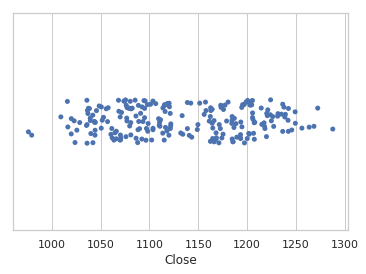

In [17]:
import seaborn as sns

sns.set(style="whitegrid")
ax = sns.stripplot(x=df1["Close"])

# Random Forest Classification (on other dataset) 
we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.

 > Define 4 new columns , whose values are:
   
   > % change between Open and Close price for the day
   
   > % change between Low and High price for the day
   
   >5 day rolling mean of the day to day % change in Close Price
   
   >5 day rolling std of the day to day % change in Close Price
   
   >Create a new column 'Action' whose values are:
   
   >1 if next day's price(Close) is greater than present day's.
   
   >(-1) if next day's price(Close) is less than present day's.
    >i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ]
   
   >i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]
   
   >Construct a classification model with the 4 new inputs and 'Action' as target
  

In [18]:
import pandas_datareader.data as pdr
from datetime import datetime, timedelta 
import numpy as np

##datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])
start = datetime(2017 , 7 ,1)
end = datetime(2019, 7 , 1)

## Importing the Google finance
df2 = pdr.DataReader("MSFT", 'yahoo', start, end)
df2.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-27,134.710007,133.509995,134.139999,134.149994,16557500.0,133.704758
2019-06-28,134.600006,133.160004,134.570007,133.960007,30043000.0,133.515411
2019-07-01,136.699997,134.970001,136.630005,135.679993,22654200.0,135.229691


In [19]:
df2['Perc'] = ((df2['Open'] - df2['Close']) /df2['Open'] )*100
df2.head(3)

,High,Low,Open,Close,Volume,Adj Close,Perc
Date,,,,,,,
2017-07-03,69.599998,68.019997,69.330002,68.169998,16165500.0,65.577812,1.673163
2017-07-05,69.440002,68.220001,68.260002,69.080002,21176300.0,66.453201,-1.201289
2017-07-06,68.779999,68.120003,68.269997,68.570000,21117600.0,65.962593,-0.439436


In [20]:
df2.pct_change().head(3)

,High,Low,Open,Close,Volume,Adj Close,Perc
Date,,,,,,,
2017-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-05,-0.002299,0.002940,-0.015433,0.013349,0.309969,0.013349,-1.717975
2017-07-06,-0.009505,-0.001466,0.000146,-0.007383,-0.002772,-0.007383,-0.634196


In [21]:
df2['perc low'] = ((df2['Low'] - df2['High'])/df2['Low'])*100
df2.head(3)

,High,Low,Open,Close,Volume,Adj Close,Perc,perc low
Date,,,,,,,,
2017-07-03,69.599998,68.019997,69.330002,68.169998,16165500.0,65.577812,1.673163,-2.322849
2017-07-05,69.440002,68.220001,68.260002,69.080002,21176300.0,66.453201,-1.201289,-1.788334
2017-07-06,68.779999,68.120003,68.269997,68.570000,21117600.0,65.962593,-0.439436,-0.968873


In [22]:
## 5 day rolling mean
pchange = df2['Close'].pct_change(1)
df2['avgclose 3'] =  pchange.rolling(5).mean()
df2['stdclose 3'] = pchange.rolling(5).std()
display(df2.head(3))

## Dropping the nan values
df2.dropna(inplace=True)

,High,Low,Open,Close,Volume,Adj Close,Perc,perc low,avgclose 3,stdclose 3
Date,,,,,,,,,,
2017-07-03,69.599998,68.019997,69.330002,68.169998,16165500.0,65.577812,1.673163,-2.322849,NaN,NaN
2017-07-05,69.440002,68.220001,68.260002,69.080002,21176300.0,66.453201,-1.201289,-1.788334,NaN,NaN
2017-07-06,68.779999,68.120003,68.269997,68.570000,21117600.0,65.962593,-0.439436,-0.968873,NaN,NaN


Create a new column 'Action' whose values are:<br>
<br>1 if next day's price(Close) is greater than present day's.
<br>(-1) if next day's price(Close) is less than present day's.
<br>i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ]
<br>i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]

In [23]:
df2['Action'] = (df2['Close']>df2['Close'].shift(1))
df2.head(5)

,High,Low,Open,Close,Volume,Adj Close,Perc,perc low,avgclose 3,stdclose 3,Action
Date,,,,,,,,,,,
2017-07-11,70.680000,69.750000,70.000000,69.989998,17460000.0,67.328598,0.014289,-1.333334,0.005315,0.008888,False
2017-07-12,71.279999,70.550003,70.690002,71.150002,17750900.0,68.444496,-0.650727,-1.034721,0.005960,0.009697,True
2017-07-13,72.040001,71.309998,71.500000,71.769997,20269800.0,69.040909,-0.377618,-1.023704,0.009179,0.006202,True
2017-07-14,73.269997,71.959999,72.239998,72.779999,25868100.0,70.012505,-0.747510,-1.820452,0.009398,0.006386,True
2017-07-17,73.449997,72.720001,72.800003,73.349998,21803900.0,70.560837,-0.755488,-1.003844,0.009467,0.006362,True


In [24]:

conditions = [df2['Action'] == True,
              df2['Action'] == False
]
choices =[
           '1',
           '-1'
]


df2['Action'] = np.select(conditions, choices)
df2.head(3)


,High,Low,Open,Close,Volume,Adj Close,Perc,perc low,avgclose 3,stdclose 3,Action
Date,,,,,,,,,,,
2017-07-11,70.680000,69.750000,70.000000,69.989998,17460000.0,67.328598,0.014289,-1.333334,0.005315,0.008888,-1
2017-07-12,71.279999,70.550003,70.690002,71.150002,17750900.0,68.444496,-0.650727,-1.034721,0.005960,0.009697,1
2017-07-13,72.040001,71.309998,71.500000,71.769997,20269800.0,69.040909,-0.377618,-1.023704,0.009179,0.006202,1


## Constructing a classification model with the 4 new inputs and 'Action' as target

In [25]:
## Dropping the nan values

df2.dropna(inplace=True)
df2.head(3)

,High,Low,Open,Close,Volume,Adj Close,Perc,perc low,avgclose 3,stdclose 3,Action
Date,,,,,,,,,,,
2017-07-11,70.680000,69.750000,70.000000,69.989998,17460000.0,67.328598,0.014289,-1.333334,0.005315,0.008888,-1
2017-07-12,71.279999,70.550003,70.690002,71.150002,17750900.0,68.444496,-0.650727,-1.034721,0.005960,0.009697,1
2017-07-13,72.040001,71.309998,71.500000,71.769997,20269800.0,69.040909,-0.377618,-1.023704,0.009179,0.006202,1


In [26]:
Xf = df2[['Perc' , 'perc low', 'avgclose 3' , 'stdclose 3']].values
yf = df2['Action'].values

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test  = train_test_split(Xf,yf,test_size=0.25)

from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest.fit(X_train,y_train)

y_pred = randomForest.predict(X_test)

cmf  = confusion_matrix(y_test,y_pred)
cmf

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[46, 15],
       [11, 53]])

In [27]:
cr3 = classification_report(y_test,y_pred)
print(cr3)

              precision    recall  f1-score   support

          -1       0.81      0.75      0.78        61
           1       0.78      0.83      0.80        64

    accuracy                           0.79       125
   macro avg       0.79      0.79      0.79       125
weighted avg       0.79      0.79      0.79       125



/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


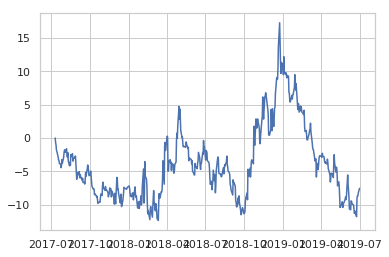

In [28]:
y = df2['Perc'].cumsum()
x = df2.index

import matplotlib.pyplot as plt
plt.plot(x,y)